<a href="https://colab.research.google.com/github/Areefahnk/NNDL-18K41A0505/blob/main/Assignment_06_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

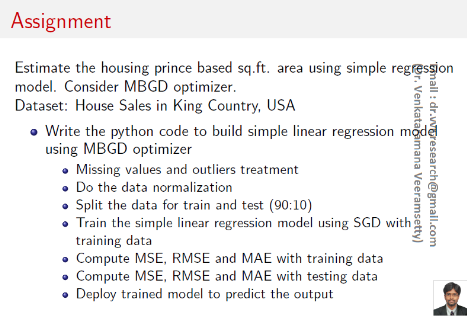

In [40]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/housing_price.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Missing values**


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

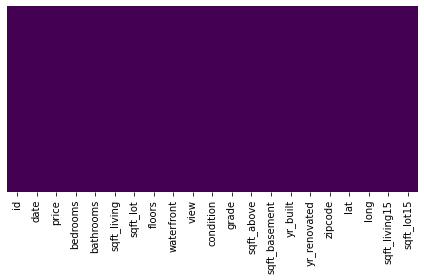

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

**Therefore no missing values**

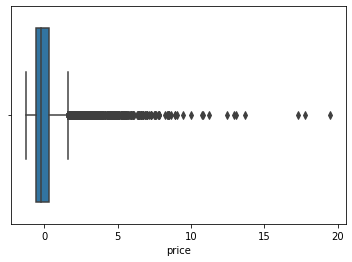

In [44]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['price']))
sns.boxplot(x=data['price'])

In [45]:
x = df
df.drop(['date'],axis=1)
for i in df:
    if i != 'date':
        q = df[i].quantile(0.99)
        df[df[i] < q]
        q_low = df[i].quantile(0.01)
        q_hi  = df[i].quantile(0.99)

        df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
        
df_filtered.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Verryfying*

In [46]:
print(len(df))
print(len(df_filtered))
if(len(df) == len(df_filtered)):
    print('There areNo outliners')
else:
  data = df_filtered
  print("We need to consider the filtered data since there are outliers")

21613
21178
We need to consider the filtered data since there are outliers


**Feature Engineering**

In [51]:
df = df[['price', 'sqft_living']]
df.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)

In [50]:
data= pd.DataFrame(data=df, columns=["price","sqft_living"])
data.head()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680


In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, 1], data.iloc[:, 0], test_size = 0.10, random_state = 42)

In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(19451,) (19451,) (2162,) (2162,)


In [8]:
batch_size = 32
n_minibatches = x_train.shape[0] // batch_size

def create_mini_batches(x_tr, y_tr, batch_size):
    mini_batches = [] 
    global n_minibatches
    for i in range(n_minibatches + 1): 
        X_mini = x_tr.iloc[i * batch_size : (i + 1) * batch_size]
        Y_mini = y_tr.iloc[i * batch_size : (i + 1) * batch_size]
        mini_batches.append((X_mini, Y_mini)) 
        if x_tr.shape[0] % batch_size != 0:
            X_mini = x_tr.iloc[i * batch_size: x_tr.shape[0]]
            Y_mini  = y_tr.iloc[i * batch_size: y_tr.shape[0]]
        mini_batches.append((X_mini,Y_mini)) 
    return mini_batches 

mini_batches_all = create_mini_batches(x_train, y_train, batch_size)

In [9]:
m = 1 #Initial value of slope
c = -1 #Initial value of intercept
lr = 0.1 #Learning Rate
delta_m = 1 #Initialising Δm
delta_c = 1 #Initialising Δc
max_iters = 10 #Maximum number of iterations  
iters_count = 0 #Counting Iterations


def deriv(m_f, c_f, datax, datay):
    m_deriv = 0
    c_deriv = 0
    for i in range(datax.shape[0]):
        x, y = datax.iloc[i], datay.iloc[i]
        m_deriv += (y-m_f*x-c_f)*x
        c_deriv += (y-m_f*x-c_f)
        m_deriv = -m_deriv/len(datax)
        c_deriv = -c_deriv/len(datay)
    return m_deriv, c_deriv  


while iters_count < max_iters:
    for i in range(n_minibatches):
        x_b, y_b = mini_batches_all[i]
        delta_m, delta_c = deriv(m, c, x_b, y_b)
        delta_m = -lr * delta_m
        delta_c = -lr * delta_c
        m += delta_m
        c += delta_c
    iters_count += 1
    print(f"Iteration: {iters_count}\tValue of m: {m}, \tValue of c: {c}")

print(f"\nThe local minima occurs at: {m}, {c}")

Iteration: 1	Value of m: 0.7854519952272078, 	Value of c: -0.42623490300776085
Iteration: 2	Value of m: 0.6991958183454019, 	Value of c: -0.1998127151903294
Iteration: 3	Value of m: 0.664502091937808, 	Value of c: -0.1104670174729536
Iteration: 4	Value of m: 0.6505413559816704, 	Value of c: -0.07521396904228948
Iteration: 5	Value of m: 0.6449210012033875, 	Value of c: -0.06130526796593927
Iteration: 6	Value of m: 0.6426573033205328, 	Value of c: -0.05581818221857195
Iteration: 7	Value of m: 0.6417451379058001, 	Value of c: -0.05365366755820519
Iteration: 8	Value of m: 0.641377407070127, 	Value of c: -0.0527998970002293
Iteration: 9	Value of m: 0.6412290908908382, 	Value of c: -0.05246316698493894
Iteration: 10	Value of m: 0.6411692428991926, 	Value of c: -0.052330372341350184

The local minima occurs at: 0.6411692428991926, -0.052330372341350184


**Training Error**

In [47]:
y_train_pred = []
for i in x_train:
  ycalc = m*i+c
  y_train_pred.append(ycalc)

**TRAINING ERROR**

In [14]:
y_train_list = list(y_train) #typecasting tuple to list

In [49]:
MSError_train = []
mse_train_total=0
for i in range(0,len(x_train)):
  mse_train = (y_train_list[i]-y_train_pred[i])
  mse_train_total+=mse_train
  MSError_train.append(mse_train)

print('MSE - TRAINING ERROR obtained:')
#print(MSError_train)
print('Mean square error: ',mse_train_total/(len(x_train)))


MSE - TRAINING ERROR obtained:
Mean square error:  0.050197924195793456


**MSE, RMSE, MAE - TRAINING DATA**

In [17]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
mse = math.sqrt(mean_squared_error(y_train, y_train_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_train, y_train_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_train_pred)
print('Mean absolute error', mae)

Root mean square error 0.7110796411623477
Mean square error 0.5056342560755731
Mean absolute error 0.45876054265883826


In [19]:
x_train_list = list(x_train)

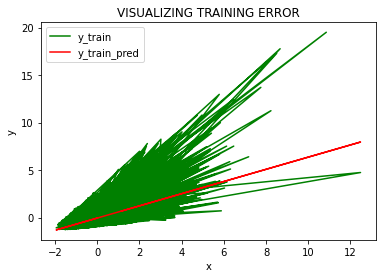

In [20]:
#Plot a line graph
import matplotlib.pyplot as plt
plt.plot(x_train_list,y_train_list,label='y_train',color='green')
plt.plot(x_train_list,y_train_pred,label='y_train_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TRAINING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**TESTING ERROR**

In [22]:
y_test_pred = []
for i in x_test:
  ycalc = m*i+c
  y_test_pred.append(ycalc.round(1))

In [23]:
y_test_list = list(y_test)

In [48]:
mse_test_total=0
MSError_test = []
for i in range(0,len(x_test)):
  mse_test = (y_test_list[i]-y_test_pred[i])
  mse_test_total+=mse_test
  MSError_test.append(mse_test)


print('MSE - TESTING ERROR obtained:')
#print(MSError_test)
print('Mean Square Error: ',mse_test_total/len(x_test))

MSE - TESTING ERROR obtained:
Mean Square Error:  0.0707670594036606


**MSE, RMSE, MAE - TESTING DATA**

In [30]:
mse = math.sqrt(mean_squared_error(y_test, y_test_pred)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_test_pred)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_test_pred)
print('Mean absolute error', mae)

Root mean square error 0.7650234994195003
Mean square error 0.5852609546640583
Mean absolute error 0.47909794088835406


In [26]:
x_test_list = list(x_test)

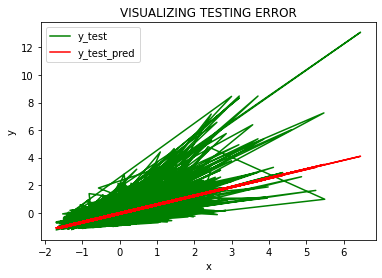

In [28]:

#Plot a line graph
plt.plot(x_test_list,y_test_list,label='y_test',color='green')
plt.plot(x_test_list,y_test_pred,label='y_test_pred',color='red')

# Add labels and title
plt.title("VISUALIZING TESTING ERROR")
plt.xlabel("x")
plt.ylabel("y")
 
plt.legend()
plt.show()

**DEPLOY - PREDICTION**

In [34]:
x = float(input("Enter mainly the sqft_living value!!! enter sqrt feet values sqft_living , sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 value :"))

y = m*x+c
print(f"price predicted  is : {y.round(1)}")

Enter mainly the sqft_living value!!! enter sqrt feet values sqft_living , sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 value :3600
price predicted  is : 2308.2
